In [1]:
import numpy as np   #importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

In [2]:
df = pd.read_csv('phishing.txt')  # loading the dataset

In [3]:
df.head()   # seeing the top 5 rows elements

,-1,1,1.1,1.2,-1.1,-1.2,-1.3,-1.4,-1.5,1.3,...,1.9,1.10,-1.11,-1.12,-1.13,-1.14,1.11,1.12,-1.15,-1.16
0,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1


In [4]:
df.shape   

(11054, 31)

In [5]:
df.columns = [ 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
           'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
           'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
           'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
           'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
           'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain',
           'DNSRecording', 'WebsiteTraffic', 'PageRank', 'GoogleIndex',
           'LinksPointingToPage', 'StatsReport', 'class' ]

In [6]:
df.head()

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 31 columns):
UsingIP                11054 non-null int64
LongURL                11054 non-null int64
ShortURL               11054 non-null int64
Symbol@                11054 non-null int64
Redirecting//          11054 non-null int64
PrefixSuffix-          11054 non-null int64
SubDomains             11054 non-null int64
HTTPS                  11054 non-null int64
DomainRegLen           11054 non-null int64
Favicon                11054 non-null int64
NonStdPort             11054 non-null int64
HTTPSDomainURL         11054 non-null int64
RequestURL             11054 non-null int64
AnchorURL              11054 non-null int64
LinksInScriptTags      11054 non-null int64
ServerFormHandler      11054 non-null int64
InfoEmail              11054 non-null int64
AbnormalURL            11054 non-null int64
WebsiteForwarding      11054 non-null int64
StatusBarCust          11054 non-null int64
DisableRigh

In [9]:
df.isnull().sum()   # finding whether the given dataset consists of null values or not

UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64

In [10]:
df.columns

Index(['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [11]:
df['LongURL'].value_counts()

-1    8960
 1    1959
 0     135
Name: LongURL, dtype: int64

In [12]:
for i in df.columns :           # finding how many unique values are there in each columns
    print(df[i].value_counts())

 1    7262
-1    3792
Name: UsingIP, dtype: int64
-1    8960
 1    1959
 0     135
Name: LongURL, dtype: int64
 1    9610
-1    1444
Name: ShortURL, dtype: int64
 1    9399
-1    1655
Name: Symbol@, dtype: int64
 1    9626
-1    1428
Name: Redirecting//, dtype: int64
-1    9589
 1    1465
Name: PrefixSuffix-, dtype: int64
 1    4070
 0    3622
-1    3362
Name: SubDomains, dtype: int64
 1    6331
-1    3556
 0    1167
Name: HTTPS, dtype: int64
-1    7388
 1    3666
Name: DomainRegLen, dtype: int64
 1    9001
-1    2053
Name: Favicon, dtype: int64
 1    9552
-1    1502
Name: NonStdPort, dtype: int64
 1    9259
-1    1795
Name: HTTPSDomainURL, dtype: int64
 1    6559
-1    4495
Name: RequestURL, dtype: int64
 0    5337
-1    3281
 1    2436
Name: AnchorURL, dtype: int64
 0    4449
-1    3956
 1    2649
Name: LinksInScriptTags, dtype: int64
-1    8439
 1    1854
 0     761
Name: ServerFormHandler, dtype: int64
 1    9041
-1    2013
Name: InfoEmail, dtype: int64
 1    9426
-1    1628
Name: 

In [15]:
df.head()

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1


In [16]:
x = df.drop('class',axis=1)   # dropping the target column in the dataset

In [192]:
y = df['class']   # creating the target individually from the given dataset

In [193]:
from sklearn.model_selection import train_test_split   # splitting the dataset to train and test

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=18)

In [48]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7737, 30), (3317, 30), (7737,), (3317,))

In [194]:
from sklearn.linear_model import LogisticRegression   # importing Logistic regression 

In [50]:
logreg = LogisticRegression(C=100)

In [195]:
logreg.fit(x_train,y_train)   # fitting the train and test data

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [196]:
logreg.score(x_train,y_train)   # train score

0.9272327775623627

In [197]:
logreg.score(x_test,y_test)   # test score

0.9279469400060295

In [198]:
y_pred = logreg.predict(x_test)   # predting the values from the x_test data

In [55]:
df_pred = pd.DataFrame({'y_pred':y_pred,
             'y_test':y_test})

In [57]:
df_pred

,y_pred,y_test
4606,1,1
4948,1,1
6028,-1,-1
3481,-1,-1
7296,-1,-1
...,...,...
8116,1,1
8238,-1,1
4287,-1,-1
2920,-1,-1


In [58]:
from sklearn.metrics import accuracy_score

In [199]:
accuracy_score(y_test,y_pred)   # performance of the model

0.9279469400060295

In [200]:
df_pred

,y_pred,y_test
4606,1,1
4948,1,1
6028,-1,-1
3481,-1,-1
7296,-1,-1
...,...,...
8116,1,1
8238,-1,1
4287,-1,-1
2920,-1,-1


In [201]:
list_y_test = list(y_test)
list_y_test

[1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 

In [202]:
list_y_pred = list(y_pred)
list_y_pred

[1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,


In [203]:
# count of misclassified samples in the test data prediction
count= 0

for i in range(len(list_y_test)) :
    if list_y_test[i] != list_y_pred[i]:
        count=count+1
print(count)        
        
    
        

239


In [204]:
# Exercise 2

In [162]:
x1 = df[['PrefixSuffix-','AnchorURL']]

In [163]:
x1.ndim

2

In [164]:
y1 = df['class']

In [165]:
y1.value_counts()

 1    6157
-1    4897
Name: class, dtype: int64

In [166]:
from sklearn.model_selection import train_test_split

In [167]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x1,y1,test_size=0.3,random_state=9)

In [168]:
x_train1.shape,x_test1.shape,y_train1.shape,y_test1.shape

((7737, 2), (3317, 2), (7737,), (3317,))

In [169]:
from sklearn.linear_model import LogisticRegression

In [170]:
lgrg = LogisticRegression(C=100)

In [171]:
lgrg.fit(x_train1,y_train1)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [205]:
lgrg.score(x_train1,y_train1)   # train score

0.8485200982292879

In [206]:
lgrg.score(x_test1,y_test1)   # test score

0.8498643352426892

In [207]:
y_pred1 = lgrg.predict(x_test1)   # predicting the values from x_test data

In [122]:
df_pred1 = pd.DataFrame({'y_test1':y_test1,
                         'y_pred1':y_pred1})

In [123]:
df_pred1

,y_test1,y_pred1
10560,1,1
6081,-1,-1
1939,1,1
7619,1,1
6926,1,1
...,...,...
6759,1,1
1548,1,1
5650,1,1
2313,-1,-1


In [208]:
accuracy_score(y_test1,y_pred1)   # performance of the model

0.8498643352426892

In [209]:
lgrg.coef_  

array([[4.95379367, 3.57279875]])

In [126]:
lgrg.intercept_

array([5.49262143])

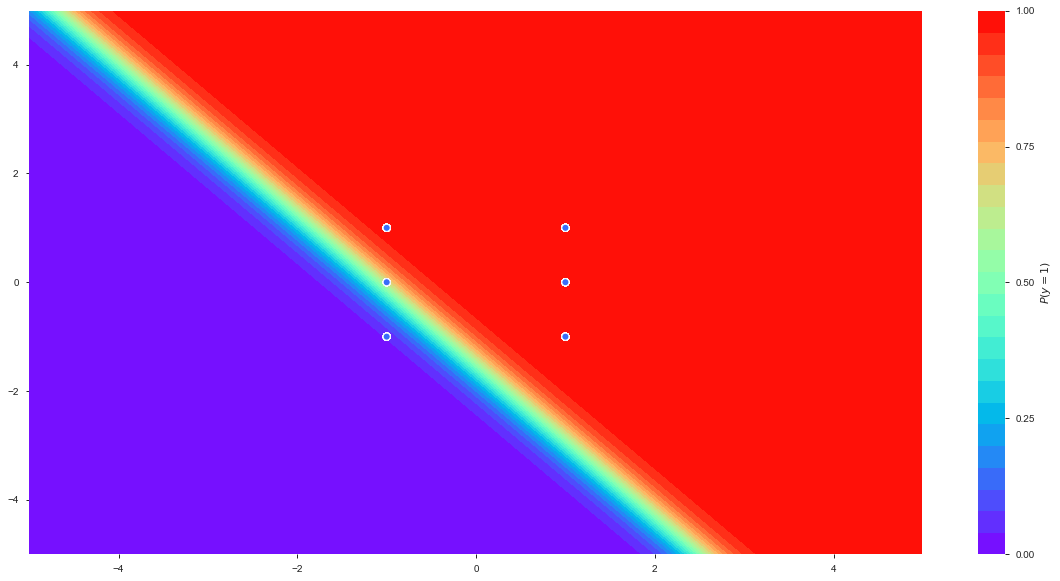

In [232]:
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = lgrg.predict_proba(grid)[:, 1].reshape(xx.shape)

#print(probs)

f, ax = plt.subplots(figsize=(20,10))
contour = ax.contourf(xx, yy, probs, 25, cmap="rainbow",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1],c = (y_test == 15 ), s=50,
           cmap="rainbow", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

"""ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")
"""
plt.show()